### **Introduction**  

This project analyzes fraudulent activities in online payments. I will explore the available data and attempt to identify patterns and key aspects that can help understand fraudsters' behavioral trends and bring business attention to them.


### **Data Collection**  

I found this dataset on the [Kaggle](https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset/data) platform and downloaded it in CSV format.  

Next, I will load the data from Google Drive.  

The dataset was last updated in 2022.

### **Column Descriptions**  

- `step`: Represents a unit of time, where 1 step equals 1 hour.  
- `type`: Type of online transaction.  
- `amount`: Transaction amount.  
- `nameOrig`: Client initiating the transaction.  
- `oldbalanceOrg`: Account balance before the transaction.  
- `newbalanceOrig`: Account balance after the transaction.  
- `nameDest`: Recipient of the transaction.  
- `oldbalanceDest`: Initial balance of the recipient before the transaction.  
- `newbalanceDest`: New balance of the recipient after the transaction.  
- `isFraud`: Indicator of a fraudulent transaction.  
- `isFlaggedFraud`: Flag set by the automated system identifying a transaction as fraudulent.

### **1. Importing All Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **2. Loading the Data**

In [ ]:
data = '/content/drive/MyDrive/Курс Дата аналітик /Data/Dataset for project/dataOnline_Payments_Fraud_Detection_Dataset.csv'
df = pd.read_csv(data)

🔹 Checking the basic information about the data, displaying the number of rows and columns, and showing the first 5 rows.

In [4]:
df.info()

num_rows, num_cols = df.shape
print(f'The dataset contains {num_rows} rows and {num_cols} columns.')

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
The dataset contains 6362620 rows and 11 columns.


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


🔹 Changing some data types for convenience.

In [5]:
df['type'] = df['type'].astype('category')

In [6]:
print(df.dtypes)

step                 int64
type              category
amount             float64
nameOrig            object
oldbalanceOrg      float64
newbalanceOrig     float64
nameDest            object
oldbalanceDest     float64
newbalanceDest     float64
isFraud              int64
isFlaggedFraud       int64
dtype: object


🔹 Analyzing missing values and duplicates in the dataset.

In [7]:
print(df.isnull().sum())

duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

# If duplicates exist, remove them immediately
df = df.drop_duplicates()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Number of duplicates: 0


✔️ I see that there are no missing values or duplicates.

🔹 Checking the number of unique transaction senders and recipients.

In [8]:
print(f"Number of unique senders: {df['nameOrig'].nunique()}")
print(f"Number of unique recipients: {df['nameDest'].nunique()}")

Number of unique senders: 6353307
Number of unique recipients: 2722362


✔️ We see that the number of recipients is significantly lower. This could indicate a bottleneck. It might be worth investigating the recipients in more detail.

🔹 Checking the percentage of fraudulent transactions and visualizing the data.

isFraud
0    99.87
1     0.13
Name: proportion, dtype: float64


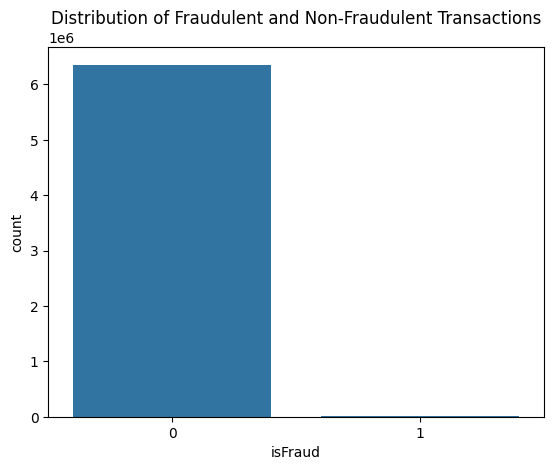

In [9]:
fraud_distribution = df['isFraud'].value_counts(normalize=True) * 100
print(fraud_distribution.round(2))


sns.countplot(x='isFraud', data=df)
plt.title("Distribution of Fraudulent and Non-Fraudulent Transactions")
plt.show();

✔️ **Share of fraudulent transactions:**  

- `0` **99.87%** – Normal transactions (99.87%)  
- `1` **0.13%** – Fraudulent transactions (0.13%)  

There is a significant imbalance in the dataset.

### **3. Detailed Data Analysis**  

Analyzing the transactions in the dataset: their count, types, and the total amount of money involved.

🔹 Number of transactions by type

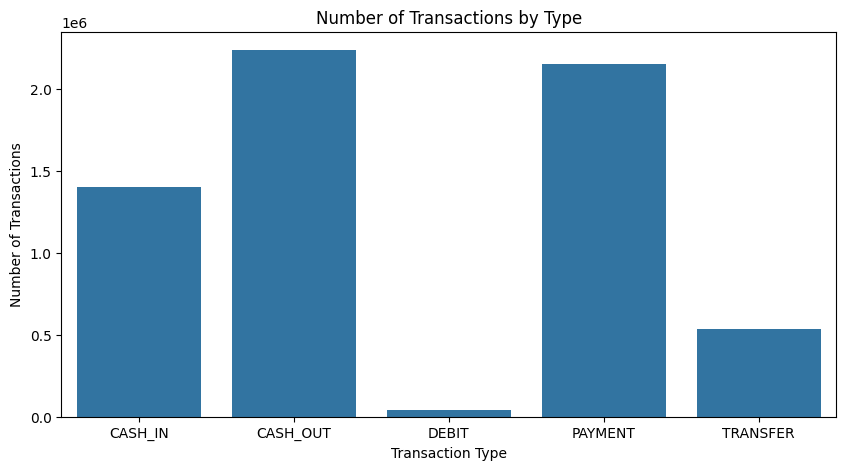

In [10]:
transaction_count_by_type = df['type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=transaction_count_by_type.index, y=transaction_count_by_type.values)
plt.title("Number of Transactions by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.show();

🔹 Total transaction amount by type

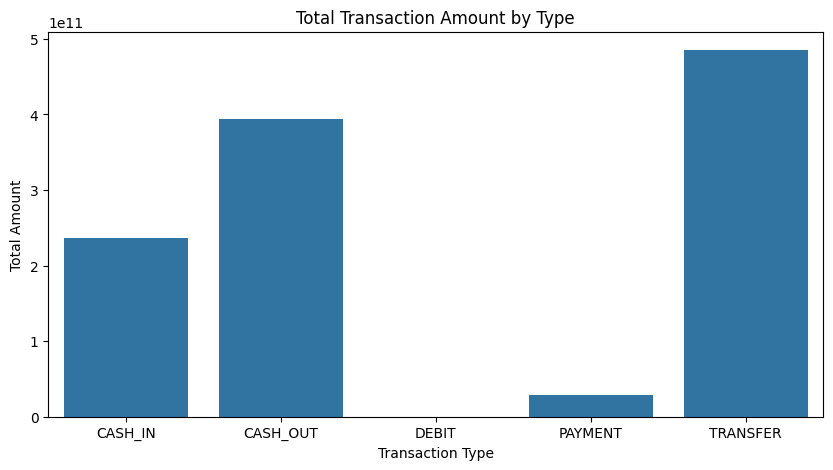

In [11]:
total_amount_by_type = df.groupby('type', observed=False)['amount'].sum().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=total_amount_by_type.index, y=total_amount_by_type.values)
plt.title("Total Transaction Amount by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Total Amount")
plt.show();

🔹 Visualization of average transaction amounts for different transaction types.

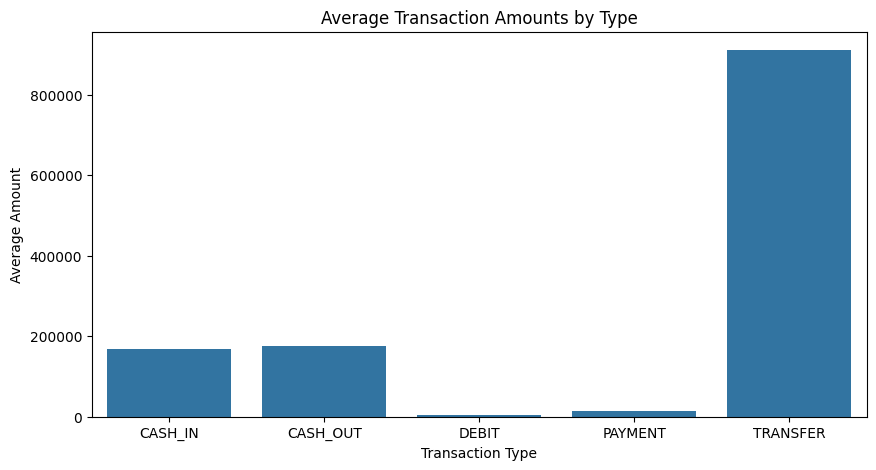

In [12]:
avg_amount_by_type = df.groupby('type', observed=False)['amount'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_amount_by_type.index, y=avg_amount_by_type.values)
plt.title("Average Transaction Amounts by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Average Amount")
plt.show();

### **4. Data Analysis with Key Questions**

**❓ 4.1 - What percentage of fraudulent transactions were detected by the system (`isFlaggedFraud` = 1)?**

🔹 Calculating the total number of fraudulent transactions and the number of transactions flagged by the system, then determining the percentage.

In [13]:
total_fraud = df.query("isFraud == 1").shape[0]

flagged_fraud = df.query("isFraud == 1 and isFlaggedFraud == 1").shape[0]

fraud_detection_rate = (flagged_fraud / total_fraud) * 100 if total_fraud > 0 else 0

print(f"Total number of fraudulent transactions: {total_fraud}")
print(f"Number of fraudulent transactions flagged by the system: {flagged_fraud}")
print(f"Percentage of detected fraudulent transactions: {fraud_detection_rate:.2f}%")

Total number of fraudulent transactions: 8213
Number of fraudulent transactions flagged by the system: 16
Percentage of detected fraudulent transactions: 0.19%


✔️ We see that the system detects fraudulent transactions very rarely—only **0.19%** of the total.  

This indicates that the algorithm responsible for flagging suspicious transactions (`isFlaggedFraud`) is not effective enough and needs improvement.

❓ **4.2 - What are the characteristics of fraudulent transactions?**

🔹 Displaying all fraudulent transactions that were flagged by the system.

In [14]:
flagged_fraud_transactions = df[df['isFlaggedFraud'] == 1]


print("Characteristics of fraudulent transactions flagged by the system:")
print(flagged_fraud_transactions.describe())

Characteristics of fraudulent transactions flagged by the system:
             step        amount  oldbalanceOrg  newbalanceOrig  \
count   16.000000  1.600000e+01   1.600000e+01    1.600000e+01   
mean   537.562500  4.861598e+06   7.817869e+06    7.817869e+06   
std    181.895196  3.572499e+06   6.972669e+06    6.972669e+06   
min    212.000000  3.538742e+05   3.538742e+05    3.538742e+05   
25%    415.500000  2.242749e+06   3.013980e+06    3.013980e+06   
50%    601.500000  4.234245e+06   4.923043e+06    4.923043e+06   
75%    678.750000  7.883451e+06   1.212835e+07    1.212835e+07   
max    741.000000  1.000000e+07   1.958504e+07    1.958504e+07   

       oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
count            16.0            16.0     16.0            16.0  
mean              0.0             0.0      1.0             1.0  
std               0.0             0.0      0.0             0.0  
min               0.0             0.0      1.0             1.0  
25%           

 ✔️ We observe that the average `step` ≈ **537**, with a maximum of **741**.  
This may indicate that fraudsters do not act randomly but instead operate at specific stages of the process.  

This characteristic could be leveraged to improve the detection system by using it as one of the filters for identifying fraudulent transactions.

**❓4.3 - Is there a difference in the average amounts of fraudulent transactions compared to those flagged by the system?**

🔹 Displaying the average amounts of fraudulent transactions and those flagged by the system.

In [15]:
avg_fraud_amount = df[df['isFraud'] == 1]['amount'].mean()
avg_flagged_fraud_amount = flagged_fraud_transactions['amount'].mean()

print(f"\nAverage amount of fraudulent transactions: {avg_fraud_amount:,.2f}")
print(f"Average amount of fraudulent transactions flagged by the system: {avg_flagged_fraud_amount:,.2f}")


Average amount of fraudulent transactions: 1,467,967.30
Average amount of fraudulent transactions flagged by the system: 4,861,597.73


✔️ The analysis shows that the **average amount of all fraudulent transactions** is approximately **1.47 million**,  
while the **average amount of transactions flagged by the system** is around **4.86 million**.  

This indicates that the system **barely detects small fraudulent transactions** and only reacts to very large amounts.  
This is a significant weakness in the detection mechanism, suggesting an area for improvement.

**❓4.4 - Does fraud impact account balance changes?**

🔹 Calculating balances based on our dataset and creating a pivot table for analysis.

In [16]:
df['balance_change_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [17]:
pivot_table_balance_change = df.pivot_table(
    values=['balance_change_orig', 'balance_change_dest'],
    index='isFraud',
    aggfunc='mean'
)

# Rounding the results for easier analysis
pivot_table_balance_change = pivot_table_balance_change.round(2)

print(pivot_table_balance_change)

         balance_change_dest  balance_change_orig
isFraud                                          
0                  123504.81             23141.52
1                  735458.00          -1457274.97


✔️ **For non-fraudulent transactions:**  

- **Senders lose** an average of **23,141.52**  
- **Recipients receive** an average of **123,504.81**  

This aligns with the normal functioning of financial transactions, where the sender transfers money and the recipient receives it.  



**For fraudulent transactions:**  

- **Recipients receive** an average of **735,458.00**  
- **Senders lose** an average of **1,457,274.97**  

This indicates that fraudulent transactions involve significantly larger losses for senders and substantial payouts for recipients.  

Thus, **fraudulent transaction recipients receive much larger amounts, which is a key characteristic of illegal operations.**  
This criterion should be considered for improving the fraud detection system.

**❓4.5 - What is the average transaction amount for fraudulent and non-fraudulent operations across different transaction types?**

🔹 Creating a pivot table to display the average transaction amount by type and fraud status.

In [18]:
pivot_table_avg_amount_by_fraud_type = df.pivot_table(
    values='amount',
    index=['isFraud', 'type'],
    aggfunc='mean',
    observed=True
)

# Rounding the results for easier analysis
pivot_table_avg_amount_by_fraud_type = pivot_table_avg_amount_by_fraud_type.round(2)

print(pivot_table_avg_amount_by_fraud_type)

                      amount
isFraud type                
0       CASH_IN    168920.24
        CASH_OUT   173917.16
        DEBIT        5483.67
        PAYMENT     13057.60
        TRANSFER   906229.01
1       CASH_OUT  1455102.59
        TRANSFER  1480891.67


✔️ For fraudulent transactions, the highest average amounts are observed in **`CASH_OUT`** and **`TRANSFER`**. This may indicate that fraudsters frequently use these transaction types to transfer large sums.  

The **average amounts for fraudulent transactions are significantly higher** than for non-fraudulent ones. This suggests that fraud often involves **large monetary values**.  

It is crucial to **pay closer attention** to these specific transaction categories.

**❓4.6 - Which transaction types are most susceptible to fraud in percentage terms?**  
*(This question will serve as a good complement and validation of the previous analysis.)*

🔹 Calculating the number of fraudulent transactions by type, then the total number of transactions, and finally computing the percentage.

In [19]:
fraud_by_type = df[df['isFraud'] == 1].groupby('type', observed=False).size()

total_fraud = df[df['isFraud'] == 1].shape[0]  # Total number of fraudulent transactions

fraud_distribution = ((fraud_by_type / total_fraud) * 100).round(2)

print(fraud_distribution)

type
CASH_IN      0.00
CASH_OUT    50.12
DEBIT        0.00
PAYMENT      0.00
TRANSFER    49.88
dtype: float64


✔️ The transaction types most susceptible to fraud are:  
- **`CASH_OUT`** (**50.12%**)  
- **`TRANSFER`** (**49.88%**)

**❓4.7 - How has the number of transactions changed over time?**

🔹 *Reminder*  

1 step = 1 hour  

Visualizing how the number of transactions changes over time using a graph.

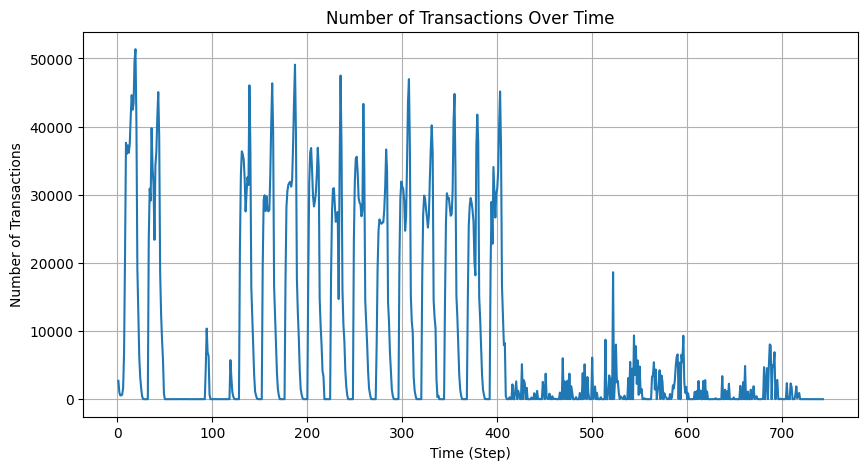

In [20]:
transactions_over_time = df.groupby('step').size()

plt.figure(figsize=(10, 5))
transactions_over_time.plot(kind='line')
plt.title("Number of Transactions Over Time")
plt.xlabel("Time (Step)")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show();

✔️ The graph shows that the number of transactions has significantly decreased over time. After **400 hours**, activity dropped **hundreds of times**.

**❓4.8 - Has the activity of fraudulent transactions changed over time? Does it correlate with regular transactions?**

🔹 Visualizing only the graph of fraudulent transactions.

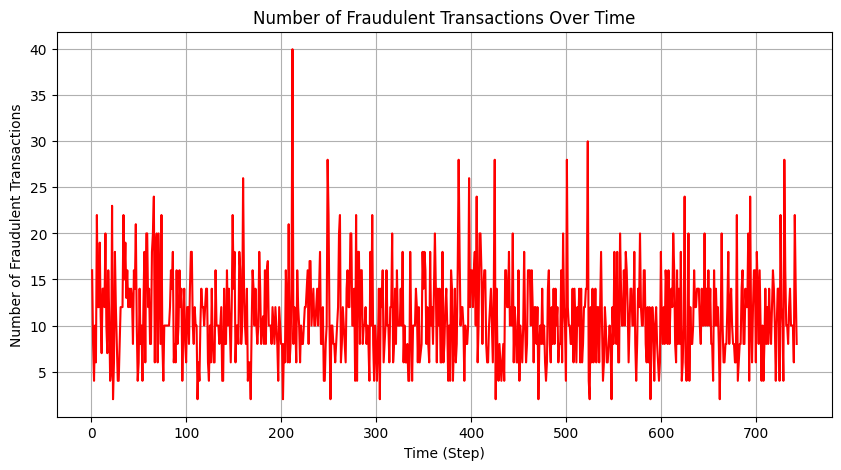

In [21]:
fraud_transactions = df[df['isFraud'] == 1]
fraud_transactions_over_time = fraud_transactions.groupby('step').size()

plt.figure(figsize=(10, 5))
fraud_transactions_over_time.plot(kind='line', color='red')
plt.title("Number of Fraudulent Transactions Over Time")
plt.xlabel("Time (Step)")
plt.ylabel("Number of Fraudulent Transactions")
plt.grid(True)
plt.show();

✔️ The graph shows that fraudulent activities always exhibit dynamics, unlike the total number of transactions. This suggests that regardless of the total transaction volume, fraudulent transactions continue to occur.  

This insight could potentially be used to identify the individuals or entities responsible for these fraudulent activities.

**❓4.9 - Are there client names (`nameOrig`) that appear multiple times in fraudulent transactions?**

In [22]:
# Filtering fraudulent transactions
fraud_transactions = df[df['isFraud'] == 1]

# Counting fraudulent transactions for each nameOrig
fraud_by_nameOrig = fraud_transactions['nameOrig'].value_counts()

# Filtering only those nameOrig that have exactly one fraudulent transaction
fraud_by_nameOrig_one = fraud_by_nameOrig.loc[fraud_by_nameOrig == 1]

# Filtering only those nameOrig that appear more than once in fraudulent transactions
fraud_by_nameOrig_more_than_1 = fraud_by_nameOrig.loc[fraud_by_nameOrig > 1]

# Checking if there are clients with only one fraudulent transaction
if len(fraud_by_nameOrig_one) == 0:
    print("\n\nThere are no clients with only one fraudulent transaction.")
else:
    print(f"Clients with only one fraudulent transaction: \n{fraud_by_nameOrig_one}")

# Displaying the list of clients with more than one fraudulent transaction
if len(fraud_by_nameOrig_more_than_1) == 0:
    print("\n\nThere are no clients with more than one fraudulent transaction.")
else:
    print(f"Clients with more than one fraudulent transaction: \n{fraud_by_nameOrig_more_than_1}\n")

Clients with only one fraudulent transaction: 
nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
              ..
C570536992     1
C980546604     1
C58682758      1
C351713185     1
C1280323807    1
Name: count, Length: 8213, dtype: int64


There are no clients with more than one fraudulent transaction.


**❓4.10 - Are there identical sender (`nameOrig`) and recipient (`nameDest`) names?**

In [23]:
# Finding common names between sender and recipient columns
common_names = np.intersect1d(df['nameOrig'].values, df['nameDest'].values)

# Identifying fraudulent transactions where the sender and recipient names are in the common names list
fraud_transactions = df[df['isFraud'] == 1]

fraud_common_names = fraud_transactions[
    fraud_transactions['nameOrig'].isin(common_names) | fraud_transactions['nameDest'].isin(common_names)
]

# Counting fraudulent transactions with common names
fraud_common_count = len(fraud_common_names)

# Total number of fraudulent transactions
total_fraud_count = len(fraud_transactions)

# Calculating the percentage of such transactions
fraud_common_percentage = (fraud_common_count / total_fraud_count) * 100 if total_fraud_count > 0 else 0

if common_names.size > 0:
    print(f"Number of common names: {len(common_names)}")
    print(f"Examples: {common_names[:10]}")
else:
    print("No common names found.")

print(f"Number of fraudulent transactions with common names: {fraud_common_count}")
print(f"Percentage of such transactions among all fraudulent transactions: {fraud_common_percentage:.2f}%")

Number of common names: 1769
Examples: ['C1000194623' 'C1000836905' 'C1002007146' 'C1002075438' 'C1003902725'
 'C100403476' 'C1004038224' 'C1005068442' 'C1005914856' 'C1007627233']
Number of fraudulent transactions with common names: 18
Percentage of such transactions among all fraudulent transactions: 0.22%


✔️ We observe that there are **18 identical names** in fraudulent transactions. This indicates that fraudsters **use the same accounts for both sending and receiving funds**.  

They may be **reusing the same accounts** to **legitimize funds or cover their tracks**.  

Some of these transactions could potentially be **money laundering attempts** carried out through a **network of proxy accounts**.  

These findings should be considered in the **further development of fraud detection systems**, as we see a clear **pattern of repeated account usage**. This could be part of a more **complex fraud scheme**, where criminals transfer funds between their own accounts before cashing them out.

### **5. Conclusions**

📌 The existing system **likely has a threshold (≈ 5 million)** for flagging suspicious transactions.  
This allows fraudsters to **avoid detection by splitting large amounts into multiple smaller payments**. The system needs improvement.  

📌 The system **detects only a very small percentage of fraudulent transactions (0.19%)**, indicating a **clear need for enhancement**.  

📌 **More attention should be paid to `CASH_OUT` and `TRANSFER` transactions**, as analysis shows that fraudsters **primarily use these transaction types**.  

📌 It is important to **track clients who appear as fraudsters but then continue making additional transactions without being flagged by the system**.  
This suggests that **money may be transferred to other accounts to evade detection**.  

📌 **Expanding the dataset with additional columns** could provide more insights and improve fraud detection.  
Additional useful information could include:  
- **Transaction days** (to analyze fraud patterns over time).  
- **Countries or regions** where transactions occurred.  
- **Bank names** associated with the accounts.  
- **Client tenure** (whether the client is new or established).  
- **Reversed or canceled transactions** (to identify suspicious reversals).  
- **Transaction execution time** (potential fraud timing patterns).  
- **Website or platform** where the transaction was made.  

These additional data points would significantly **enhance the analysis of fraudsters' behavior** and improve detection accuracy.